In [152]:
#import necessary libraries 
%matplotlib inline
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

Populating the interactive namespace from numpy and matplotlib


/Users/sedacavdaroglu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


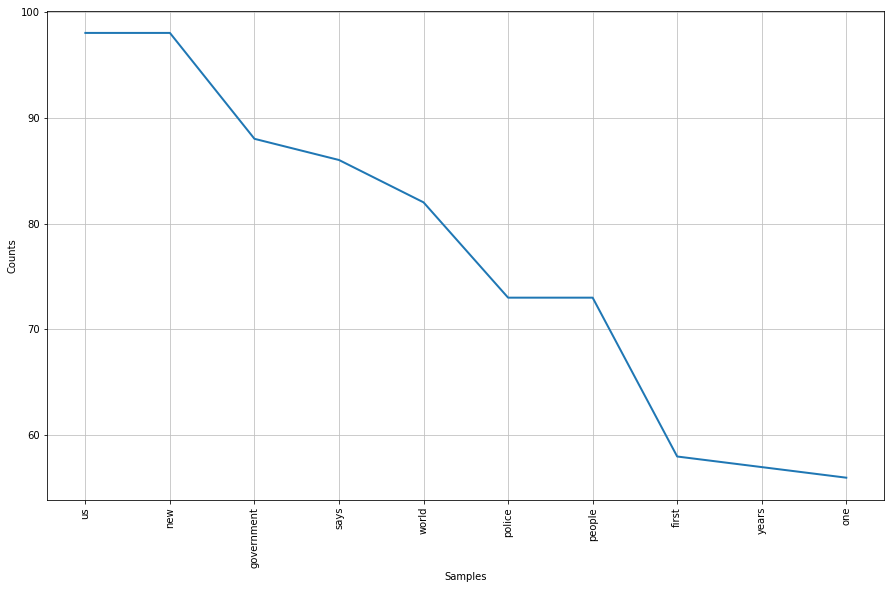

In [153]:
#read the news csv file
news=pd.read_csv('/Users/sedacavdaroglu/Downloads/stocknews/Combined_News_DJIA.csv',\
                parse_dates=True)
textStr=news['Top1'].str.cat(sep=' ').split()
textStr = [w.lower() for w in textStr]
stop = set(stopwords.words('english'))
remove_words=['"b','\'b','?','the','-']
cleanText=[]
#remove stop words
for i in range(1,len(textStr)):
    if textStr[i] not in (stop):
        if textStr[i] not in (remove_words):
            cleanText.append(textStr[i])
text=nltk.Text(cleanText)

#get frequency distribution of words in hottest news [Top1]
fdist = nltk.FreqDist(text)
fdist.most_common(10)
fdist.plot(10)

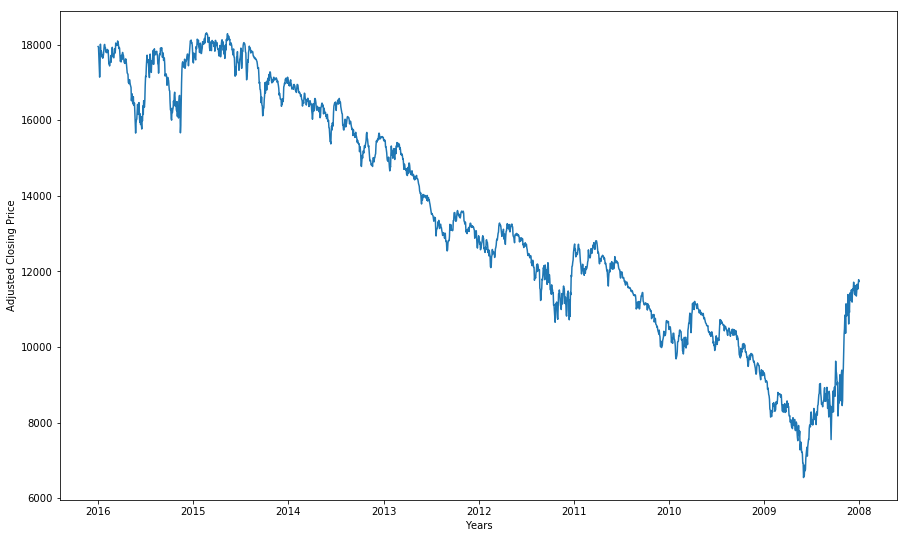

In [262]:
import datetime as dt
#read stock market csv
stock_market=pd.read_csv('/Users/sedacavdaroglu/Downloads/stocknews/DJIA_table.csv',parse_dates=True)
stock_market['year'] = pd.DatetimeIndex(stock_market['Date']).year
stock_market['month'] = pd.DatetimeIndex(stock_market['Date']).month
#plot the adjusted closing price of the stock market from 2008 to 2017 (all the data)
plt.plot(stock_market["Adj Close"]) #plot the adjusted closing price
plt.ylabel('Adjusted Closing Price')
interval=len(stock_market)/len(stock_market['year'].unique())#find the rough number of data points between years -for now a crude measure
plt.xticks(np.linspace(0,len(stock_market),len(stock_market['year'].unique())), stock_market['year'].unique())
plt.xlabel('Years')